# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

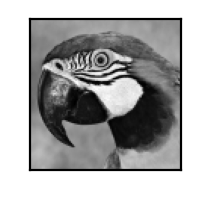

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from math import floor

# Load required files
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/lena.bmp --no-check-certificate

I = cv2.imread('parrot.bmp')           # Read image
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) # Convert to RGB

I4 = cv2.imread('lena.bmp')
I4 = cv2.cvtColor(I4, cv2.COLOR_BGR2GRAY)


# Display
plt.figure(figsize=(I.shape[0]/100,I.shape[1]/100), dpi=200)
plt.imshow(I, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [2]:
if not os.path.exists("ainvert.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/ainvert.py --no-check-certificate

#TODO Do samodzielnej implementacji

from ainvert import A_invert

In [3]:
def scale_interpole (I, s, t):
    aritm, mem = 0, 0
    w, h = I.shape
    new_w = int(w * s)
    new_h = int(h * t)
    new_I = np.zeros ((new_w, new_h))
    for i in range (new_w):
        for j in range (new_h):
            A = (min(w-2, floor(i/s)), min(h-2, floor(j/t)))
            B = (A[0], A[1]+1)
            C = (A[0]+1, A[1]+1)
            D = (A[0]+1, A[1])
            aritm += 4
            
            fA = I[A]
            fB = I[B]
            fC = I[C]
            fD = I[D]
            mem += 4
            
            ni, nj = i/s, j/t
            M1 = np.array([A[0]+1-ni, ni-A[0]])
            M2 = np.array([A[1]+1-nj, nj-A[1]])
            M = np.array([[fA, fD], [fB, fC]])
            new_I[i,j] = M1 @ M @ M2.T
            aritm += 8
    plt.figure(figsize=(new_I.shape[0]/100,new_I.shape[1]/100), dpi=200)
    plt.imshow(new_I, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    print ("arytmetyczne:   ", aritm)
    print ("odczyt pamięci: ", mem)


In [4]:
mem = lambda w, h, s, t: int(w*s) * int(h*t) * 4
aritm = lambda w, h, s, t: int(w*s) * int(h*t) * 12

In [5]:
def value (I, i, j):
    return I[i, j]

def derivative_x (I, i, j):
    return (I[i+1, j] - I[i-1, j])/2

def derivative_y (I, i, j):
    return (I[i, j+1] - I[i, j-1])/2

def derivative_xy (I, i, j):
    return (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4

def make_derivative (I, func, args):
    return [func(I, *P) for P in args]
    

def cubic_interpole (I, s, t):
    aritm, mem = 0, 0
    w, h = I.shape
    new_w = int(w * s)
    new_h = int(h * t)
    new_I = np.zeros ((new_w, new_h))
    for i in range (new_w):
        for j in range (new_h):
            i_old, j_old = floor(i//s), floor(j//t)
            ni = max(1, min(w-3, i_old))
            nj = max(1, min(h-3, j_old))       
            A = (ni, nj)
            B = (ni, nj+1)
            C = (ni+1, nj+1)
            D = (ni+1, nj)
            aritm += 4
            points = [A, D, B, C]
            x = []
            for fun in [value, derivative_x, derivative_y, derivative_xy]:
                x += make_derivative(I, fun, points)
            aritm += 4*6
            mem += 4*9
            
            a = A_invert @ x#np.linalg.solve(np.linalg.inv(A_invert), np.array(x))
            aritm += 16*16
            a = a.reshape((4,4)).T
            x = i/s - i//s
            y = j/t - j//t
            #x = y = 1
            M1 = np.array([1, x, x**2, x**3])
            M2 = np.array([1, y, y**2, y**3]).T
            aritm += 4
            new_I[i, j] = M1 @ a @ M2
            
            aritm += 16*16*2
    
    plt.figure(figsize=(new_I.shape[0]/100,new_I.shape[1]/100), dpi=200)
    plt.imshow(new_I, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    print ("arytmetyczne:   ", aritm)
    print ("odczyt pamięci: ", mem)


In [6]:
mem_cubic = lambda w, h, s, t: int(w*s) * int(h*t) * 36
aritm_cubic = lambda w, h, s, t: int(w*s) * int(h*t) * 800

Liczba odczytów z pamięci zwiększa się 9-krotnie, a liczba operacji wzrasta 67 razy.

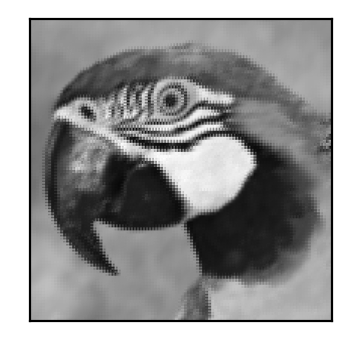

arytmetyczne:    480000
odczyt pamięci:  160000


<ipython-input-5-9cfcf3879994>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[i+1, j] - I[i-1, j])/2
<ipython-input-5-9cfcf3879994>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[i, j+1] - I[i, j-1])/2
<ipython-input-5-9cfcf3879994>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4


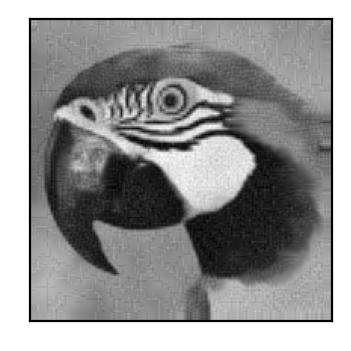

arytmetyczne:    32000000
odczyt pamięci:  1440000


In [7]:
scale_interpole (I, 2, 2)
cubic_interpole (I, 2, 2)

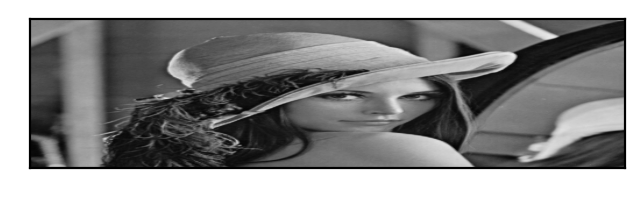

arytmetyczne:    7077888
odczyt pamięci:  2359296


<ipython-input-5-9cfcf3879994>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[i+1, j] - I[i-1, j])/2
<ipython-input-5-9cfcf3879994>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[i, j+1] - I[i, j-1])/2
<ipython-input-5-9cfcf3879994>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4


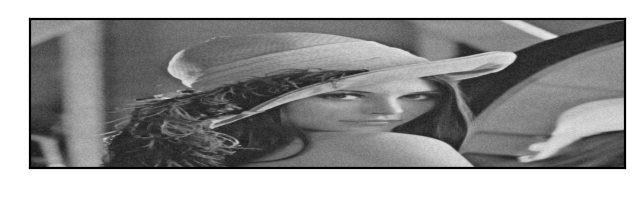

arytmetyczne:    471859200
odczyt pamięci:  21233664


In [8]:
scale_interpole (I4, 0.75, 3)
cubic_interpole (I4, 0.75, 3)